**Deep Learning for Natural Language Processing: Homework 1**

> Eirini Kolimatsi \
> MSc Computer Science, University of Athens \
>
> **Email**: eirini [dot] kolimatsi [at] di [dot] uoa [dot] gr \
> **Student ID**: 7115112200015


### Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, learning_curve, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Data Preprocessing & Evaluation Functions

In [ ]:
# Remove contractions

contractions_dict = contractions.contractions_dict

def contraction_replace(text):
        for key in contractions_dict:
            text = text.replace(key, contractions_dict[key])
        return text

# df['review'] = df['review'].apply(contraction_replace)

# df['review']

In [ ]:
#Text cleaning

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text.strip()

# df['review'] = df['review'].apply(preprocessor)

# df['review']

In [ ]:
# Stopwords

stop = stopwords.words('english')

def rm_stop(text):
  text = ' '.join([word for word in text.split() if word not in (stop)])
  return text

# df['review'] = df['review'].apply(rm_stop)

# df['review']

In [ ]:
#Stemming

porter = PorterStemmer()

def simple_stemmer(text):
    text= ' '.join([porter.stem(word) for word in text.split()])
    return text

# df['review'] = df['review'].apply(simple_stemmer)

In [ ]:
#Lemmatization

lemmatizer = nltk.stem.WordNetLemmatizer()
def Lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(y,'v') for y in word_tokenize(text)])

# df['review'] = df['review'].apply(Lemmatize)

In [ ]:
# Print Wordcloud

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
def get_scores(clf):
  predictions_train = clf.predict(X_train)
  predictions_test = clf.predict(X_test)

  # Precision
  pr_train = precision_score(Y_train, predictions_train)
  pr_test = precision_score(Y_test, predictions_test)

  print("Precision (train):", pr_train)
  print("Precision (validation):", pr_test)

  # Recall
  rc_train = recall_score(Y_train, predictions_train)
  rc_test = recall_score(Y_test, predictions_test)

  print("Recall (train):", rc_train)
  print("Recall (validation):", rc_test)

  # F-Score

  f1_train = f1_score(Y_train, predictions_train)
  f1_test = f1_score(Y_test, predictions_test)

  print("F1 Score (train):", f1_train)
  print("F1 Score (validation):", f1_test)

In [ ]:
def cross_val_model(clf, cv=10):
  cv_results = cross_validate(clf, X, y, cv=cv, scoring=('precision', 'recall', 'f1'), return_train_score=True)

  print('Precision: ', np.mean(cv_results['train_precision']), np.mean(cv_results['test_precision']))
  print('Recall: ', np.mean(cv_results['train_recall']), np.mean(cv_results['test_recall']))
  print('F1 score: ', np.mean(cv_results['train_f1']), np.mean(cv_results['test_f1']))

### Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/My Drive/Colab Notebooks/data/imdb-reviews.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data, sep='\t')
print(df)

df.describe()

                                                    url  rating  \
0      http://www.imdb.com/title/tt0120623/usercomments    10.0   
1      http://www.imdb.com/title/tt0043117/usercomments     9.0   
2      http://www.imdb.com/title/tt0043117/usercomments    10.0   
3      http://www.imdb.com/title/tt0835204/usercomments     4.0   
4      http://www.imdb.com/title/tt0499603/usercomments    10.0   
...                                                 ...     ...   
45003  http://www.imdb.com/title/tt0449000/usercomments     1.0   
45004  http://www.imdb.com/title/tt0109382/usercomments     1.0   
45005  http://www.imdb.com/title/tt0375560/usercomments     1.0   
45006  http://www.imdb.com/title/tt0165107/usercomments     1.0   
45007  http://www.imdb.com/title/tt0041513/usercomments    10.0   

                                                  review  
0      I thought this was a quiet good movie. It was ...  
1      Wagon Master is a very unique film amongst Joh...  
2      This film h

,rating
count,45008.000000
mean,5.481914
std,3.494293
min,1.000000
25%,2.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
df.isnull().sum()

url       0
rating    0
review    0
dtype: int64

In [ ]:
df['url'] = df['url'].apply(lambda x: x[26:][:-13])
df.groupby('url').count().sort_values('rating')

,rating,review
url,,
tt0403237,1,1
tt0396190,1,1
tt0390179,1,1
tt0065025,1,1
tt0389796,1,1
...,...,...
tt0379889,30,30
tt0116209,30,30
tt0066819,30,30


Positive Words


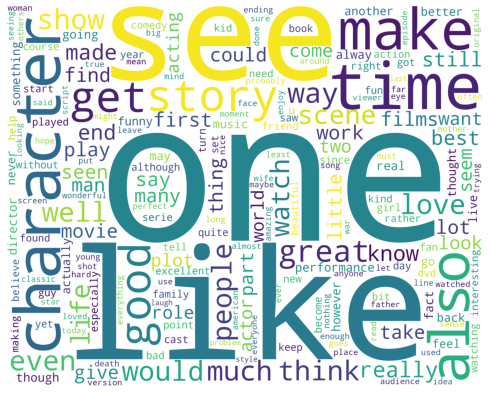

In [ ]:
positive_df=df.loc[df['rating'] >= 7, 'review'].apply(preprocessor)
print("Positive Words")
wordcloud_draw(positive_df)

Negative Words


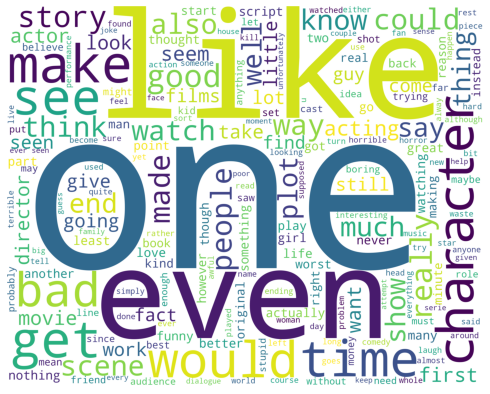

In [ ]:
negative_df=df.loc[df['rating'] <= 4, 'review'].apply(preprocessor)
print("Negative Words")
wordcloud_draw(negative_df)

### Data Preparation

In [ ]:
df.loc[df['rating'] <= 4, 'rating'] = 0
df.loc[df['rating'] >= 7, 'rating'] = 1
df['rating'].value_counts()

1.0    22508
0.0    22500
Name: rating, dtype: int64

In [ ]:
df['review'] = df['review'].apply(preprocessor)
df_copy = df.copy()

In [ ]:
count_vect = CountVectorizer(max_features=2000)

X = count_vect.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

### Training - 1st Attempt

In [ ]:
clf = LogisticRegression(max_iter=1500, C=1, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.9024430414493549
Precision (validation): 0.8656943839791031
Recall (train): 0.9131207643595156
Recall (validation): 0.88260097647581
F1 Score (train): 0.9077505039070051
F1 Score (validation): 0.874065934065934


In [ ]:
clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8904639877869255
Precision (validation): 0.8744560487380331
Recall (train): 0.9072325297189201
Recall (validation): 0.8919218819351975
F1 Score (train): 0.8987700520045127
F1 Score (validation): 0.8831026148099319


In [ ]:
cross_val_model(clf)

Precision:  0.8901395589598431 0.8753139473157765
Recall:  0.9061074556155203 0.8915052273063824
F1 score:  0.8980523558387767 0.8833186823944799


### Training - 2nd Attempt

In [ ]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.791118675537676
Precision (validation): 0.7870698644421272
Recall (train): 0.851693503609106
Recall (validation): 0.8390395731436194
F1 Score (train): 0.8202893125484638
F1 Score (validation): 0.8122242548154525


In [ ]:
tfidf = TfidfVectorizer(stop_words = stop)

X = tfidf.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8143405889884763
Precision (validation): 0.8045427375971309
Recall (train): 0.8854485715876816
Recall (validation): 0.8872775214238628
F1 Score (train): 0.848407235473027
F1 Score (validation): 0.8438871473354231


In [ ]:
tfidf = TfidfVectorizer(stop_words = stop, min_df = 3)

X = tfidf.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.805019498050195
Precision (validation): 0.797104323681079
Recall (train): 0.8931661859329931
Recall (validation): 0.8970982142857142
F1 Score (train): 0.8468051538259269
F1 Score (validation): 0.8441503885738292


In [ ]:
tfidf = TfidfVectorizer(stop_words = stop, min_df = 3, ngram_range=(1,3))

X = tfidf.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8527996500437446
Precision (validation): 0.8456883509833586
Recall (train): 0.8709443234489306
Recall (validation): 0.8504672897196262
F1 Score (train): 0.8617764884652576
F1 Score (validation): 0.8480710879930646


### Training - 3rd Attempt

In [ ]:
df = df_copy.copy()
df['review'] = df['review'].apply(contraction_replace).apply(rm_stop).apply(Lemmatize)

In [ ]:
tfidf = TfidfVectorizer(stop_words = stop, min_df = 3, ngram_range=(1,3))

X = tfidf.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8276428608101863
Precision (validation): 0.8145327295183203
Recall (train): 0.8941646327934324
Recall (validation): 0.8832589285714286
F1 Score (train): 0.8596187175043327
F1 Score (validation): 0.8475048190190619


In [ ]:
count_vect = CountVectorizer(max_features=2000)

X = count_vect.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8855989966737554
Precision (validation): 0.8688102893890676
Recall (train): 0.9050431875174143
Recall (validation): 0.8882314266929652
F1 Score (train): 0.895215521993165
F1 Score (validation): 0.8784135240572172


### Training - 4th Attempt

In [ ]:
df = df_copy.copy()
df['review'] = df['review'].apply(contraction_replace).apply(rm_stop).apply(simple_stemmer)

In [ ]:
tfidf = TfidfVectorizer(stop_words = stop, min_df = 3, ngram_range=(1,3))

X = tfidf.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.817669267556003
Precision (validation): 0.8024741431758264
Recall (train): 0.8991917626217892
Recall (validation): 0.8904140414041404
F1 Score (train): 0.8564950301879828
F1 Score (validation): 0.84416


In [ ]:
count_vect = CountVectorizer(max_features=2000)

X = count_vect.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8835975972725797
Precision (validation): 0.8693957115009746
Recall (train): 0.9050496092234355
Recall (validation): 0.8985896574882472
F1 Score (train): 0.8941949616648412
F1 Score (validation): 0.8837516512549537


### Finalise Training

The model from the 1st attempt seems to perform the best, so we're going to fine tune it and select the best parameters.

In [ ]:
df = df_copy.copy()

count_vect = CountVectorizer(max_features=2000)

X = count_vect.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)

Precision (train): 0.8908862419407715
Precision (validation): 0.8723821989528796
Recall (train): 0.9063368538076709
Recall (validation): 0.8851261620185923
F1 Score (train): 0.8985451339138102
F1 Score (validation): 0.8787079762689519


Hyperparameters tuning

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=10, random_state=2, max_iter=1500, Cs=[0.001,0.01,0.1,1,10], penalty="l2",
                           solver = "lbfgs").fit(X, y)

clf.C_

array([0.01])

In [ ]:
clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)
cross_val_model(clf)

Precision (train): 0.8915715300158409
Precision (validation): 0.8722802436901653
Recall (train): 0.9055703506435864
Recall (validation): 0.8940677966101694
F1 Score (train): 0.8985164184855908
F1 Score (validation): 0.8830396475770924
Precision:  0.8901395589598431 0.8753139473157765
Recall:  0.9061074556155203 0.8915052273063824
F1 score:  0.8980523558387767 0.8833186823944799


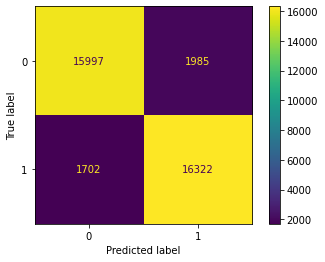

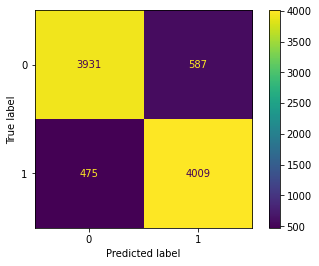

In [ ]:
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

cm_train = confusion_matrix(Y_train, predictions_train)
cm_train_display = ConfusionMatrixDisplay(cm_train).plot()

cm_test = confusion_matrix(Y_test, predictions_test)
cm_test_display = ConfusionMatrixDisplay(cm_test).plot()

### Test set

In [ ]:
test_data = 'path/to/test/data'

In [ ]:
df = pd.read_csv(test_data, sep='\t')
print(df)

df.loc[df['rating'] <= 4, 'rating'] = 0
df.loc[df['rating'] >= 7, 'rating'] = 1
df['rating'].value_counts()

df['review'] = df['review'].apply(preprocessor)

count_vect = CountVectorizer(max_features=2000)

X = count_vect.fit_transform(df.loc[:,'review'])
y = df.loc[:,'rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = LogisticRegression(max_iter=1500, C=0.01, penalty="l2", random_state=2)
clf.fit(X_train, np.ravel(Y_train))
get_scores(clf)
cross_val_model(clf)